#### Step 1: Import packages

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd


#### Step 2: Load the pretrained weights

In [4]:
path = r'C:\Users\pmspr\Documents\Machine Learning\Courses\Tensorflow Cert\Git\Tensorflow-Cert\Coursera\01 - Data'
folder = 'InceptionV3Weights'
abs_path = os.path.join(path,folder)
if not os.path.exists(abs_path):
    Iv3_weights_r = tf.keras.utils.get_file('inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                                         cache_subdir=abs_path,
                                                         origin = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                                         extract = True)

    Iv3_weights = os.path.dirname(Iv3_weights_r)+'/InceptionV3Weights/'
else:
    Iv3_weights = abs_path

#### Step 3: Create the model with pretrained weights

In [10]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = os.path.join(Iv3_weights,'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  # Your Code Here
  layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_470 (Conv2D)             (None, 74, 74, 32)   864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_470 (BatchN (None, 74, 74, 32)   96          conv2d_470[0][0]                 
__________________________________________________________________________________________________
activation_470 (Activation)     (None, 74, 74, 32)   0           batch_normalization_470[0][0]    
_______________________________________________________________________________________

#### Step 4: Get required layers

In [11]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


#### Step 5: Code the callback

In [50]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nReached 97.0% accuracy so cancelling training!")
      self.model.stop_training = True

#### Step 6: Prepare the top layers

In [13]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_470 (Conv2D)             (None, 74, 74, 32)   864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_470 (BatchN (None, 74, 74, 32)   96          conv2d_470[0][0]                 
__________________________________________________________________________________________________
activation_470 (Activation)     (None, 74, 74, 32)   0           batch_normalization_470[0][0]    
______________________________________________________________________________________________

#### Step 7: Get the Horse and human dataset

In [23]:
# Get the Horse or Human dataset
#path_horse_or_human = f"{getcwd()}/../tmp2/horse-or-human.zip"
# Get the Horse or Human Validation dataset
#path_validation_horse_or_human = f"{getcwd()}/../tmp2/validation-horse-or-human.zip"
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import os
#import zipfile
#import shutil

#shutil.rmtree('/tmp')
#local_zip = path_horse_or_human
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp/training')
#zip_ref.close()

#local_zip = path_validation_horse_or_human
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp/validation')
#zip_ref.close()

path = r'C:\Users\pmspr\Documents\Machine Learning\Courses\Tensorflow Cert\Git\Tensorflow-Cert\Coursera\01 - Data'

folder = 'horse_and_human'
abs_path = os.path.join(path,folder)
if not os.path.exists(abs_path):
    horse_or_human_zip = tf.keras.utils.get_file('horse-or-human.zip',
                                                         cache_subdir=abs_path,
                                                         origin = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip',
                                                         extract = True)

    hh_file = abs_path
    os.remove(horse_or_human_zip)
else:
    hh_file = abs_path
    
folder = 'validation_horse_or_human'
abs_path = os.path.join(path,folder)
if not os.path.exists(abs_path):
    validation_horse_or_human_zip = tf.keras.utils.get_file('validation-horse-or-human.zip',
                                                         cache_subdir=abs_path,
                                                         origin = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip',
                                                         extract = True)

    vhh_file = abs_path
    os.remove(validation_horse_or_human_zip)
else:
    vhh_file = abs_path
    
#print(hh_file)
#print(vhh_file)

C:\Users\pmspr\Documents\Machine Learning\Courses\Tensorflow Cert\Git\Tensorflow-Cert\Coursera\01 - Data\horse_and_human
C:\Users\pmspr\Documents\Machine Learning\Courses\Tensorflow Cert\Git\Tensorflow-Cert\Coursera\01 - Data\validation_horse_or_human


In [25]:
# Define our example directories and files
train_dir = hh_file
validation_dir = vhh_file

train_horses_dir = os.path.join(hh_file, 'horses')
train_humans_dir = os.path.join(hh_file, 'humans')
validation_horses_dir = os.path.join(vhh_file, 'horses')
validation_humans_dir = os.path.join(vhh_file, 'humans')

train_horses_fnames = os.listdir(train_horses_dir)
train_humans_fnames = os.listdir(train_humans_dir)
validation_horses_fnames = os.listdir(validation_horses_dir)
validation_humans_fnames = os.listdir(validation_humans_dir)

print('total training Horse images :', len(train_horses_fnames))
print('total training Human images :', len(train_humans_fnames))
print('total Validation Horse images :', len(validation_horses_fnames))
print('total Validation Human images :', len(validation_humans_fnames))

total training Horse images : 500
total training Human images : 527
total Validation Horse images : 128
total Validation Human images : 128


In [26]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [53]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 97% accuracy

callbacks = myCallback()
history = model.fit_generator(train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 52,
            epochs = 3,
            validation_steps = 13,
            verbose = 2,
            callbacks=[callbacks])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 52 steps, validate for 13 steps
Epoch 1/3

Reached 97.0% accuracy so cancelling training!
52/52 - 30s - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.1352 - val_accuracy: 0.9844


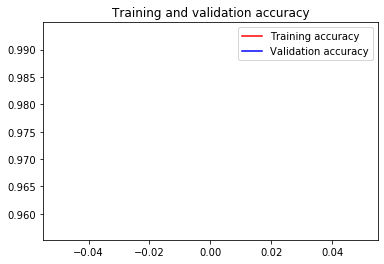

<Figure size 432x288 with 0 Axes>

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()